# Density Profiles

Here we study the properties of the different desnity profiles that 
are usefull in galaxy formation theory, such as:

1. Plummer Profile
2. Hernquist Profile
3. Isothermal
4. NFW

# Plummer Profile:

The plumer density profile is one of the simplest models which describes
a constant density near the center and falls at large radii. 

$\Phi_P(r) = - \frac{GM}{\sqrt{r^2+a^2}}$

The scale length set the length $a$ in which the mayority of the density is enclosed. Note
that if $a$ is cero the plummer potential would be exactly as the potential of a point mass. 
In the other hand if $a$ goes to infty the potential is rewpresenting a very extended mass source.
In other words the scale length set up the size of the volume in which the mass $M$ is enclosed.

We may use Poisson equation in order to find the the density profile of the Plummer potential. 

$\nabla ^2 \Phi_P(r) = 4 \pi G \rho_P(r)$

$\nabla ^2 \Phi_P(r) = \frac{1}{r^2}\frac{d}{dr} \left (  r^2 \frac{d\Phi_P(r)}{dr} \right)$

$\frac{d\Phi_P(r)}{dr} = -GM \frac{r}{(r^2 + a^2)^{3/2}} $

$\frac{d}{dr} \left(  r^2 \frac{d\Phi_P(r)}{dr} \right) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$4 \pi G \rho_P(r) = \frac{3GMa^2}{(r^2 + a^2)^{5/2}}$

$\rho_P(r) = \frac{3M}{4 \pi} \frac{a^2}{(r^2 + a^2)^{5/2}} $

$\rho_P (r) = \frac{3M}{4\pi a^3} (1 + \frac{r^2}{a^2})^{-5/2}$

In order to get the mass we integrate over all the volume of radius $r'$

$M_P(<r) = 4 \pi \int_0^r r'^2\frac{3M}{4\pi a^3} (1 + \frac{r'^2}{a^2})^{-5/2} dr'$

$M_P(<r) = \frac{3M}{a^3} \left( \frac{a^4 r^3 \sqrt{r^2/a^2 + 1}}{3(r^2 + a^2)^2}  \right)$

$M_P(<r) = M \frac{r^3}{(a^2+r^2)^{3/2}}$

Finally a quantity of particular interest is the circular velocity which can be derived as follows:

If a test particle of mass $m$ is orbitating the extended mass $M$ then in order to be in equilibrium
the gravitational force $F_g$ must be equal to the centripetal force.

$F_g = \frac{GmM}{r^2} = ma_c = m \frac{v_c^2}{r}$

$v_c = \sqrt{\frac{GM(<r)}{r}} $

$v_c = \sqrt{GM(\frac{r^2}{(r^2+a^2)^{3/2}})}$

In [39]:
%pylab inline
from astropy import constants
from astropy import units 

Populating the interactive namespace from numpy and matplotlib


In [40]:
G = constants.G
print G
G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
print G

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010
4.51835939627e-39 kpc3 / (s2 solMass)


In [41]:
M = 1E12 #Msun
M = M*units.Msun
print M

1e+12 solMass


In [42]:
def mass_plummer(a, r, M):
    a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    return Mass

In [43]:
def rho_plummer(a, r, M):
    a = a*units.kpc
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5/2)
    return rho

In [44]:
def potential_plummer(a, r, M):
    a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    return phi

In [45]:
def vc_plummer(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    vc = vc.to(units.km / units.s)
    return vc

In [46]:
R = np.linspace(0, 25)
R = R*units.kpc

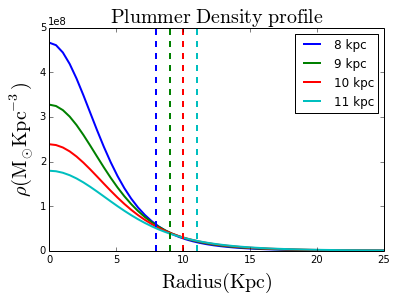

In [50]:
for i in range(8, 12):
    plot(R, rho_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
axvline(8, ls='--', lw=2, c='b')
axvline(9, ls='--', lw=2, c='g')
axvline(10, ls='--', lw=2, c='r')
axvline(11, ls='--', lw=2, c='c')
legend()
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
title('$\mathrm{Plummer\ Density\ profile}$', fontsize=20)

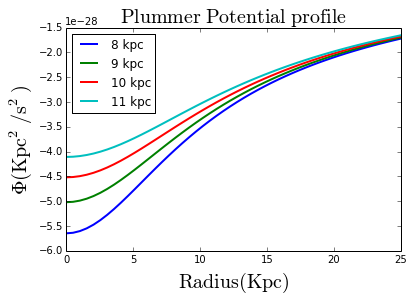

In [53]:
for i in range(8, 12):
    plot(R, potential_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(Kpc^2/s^2)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)

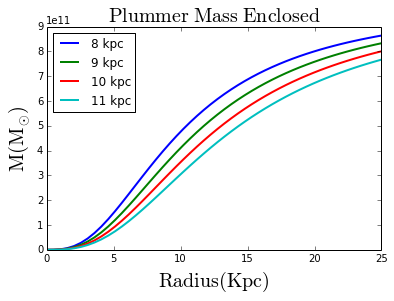

In [52]:
for i in range(8, 12):
    plot(R, mass_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
title('$\mathrm{Plummer\ Mass\ Enclosed}$', fontsize=20)

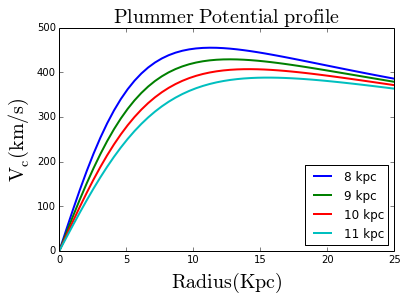

In [54]:
for i in range(8, 12):
    plot(R, vc_plummer(i, R, M), lw=2, label = str(i) + ' kpc')
legend(loc='best')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
title('$\mathrm{Plummer\ Potential\ profile}$', fontsize=20)

# Hernquist Profile

$\Phi = - \frac{GM}{r+a}$

$\rho_{Hernquist}(r) =  \frac{M}{2\pi} \frac{a}{r(r+a)^3}$

$M_{Hernquist}(<r) = 2aM \int \frac{r}{(r+a)^3}dr $

$M_{Hernquist}(<r) = M \frac{r^2}{(r+a)^2}$

$v_c(r) = GM \frac{r}{(r+a)^2}$



In [56]:
def Potential_Hernquist(a, r, M):
    a = a*units.kpc
    phi = -G*M / (r+a)
    return phi

In [57]:
def Density_Hernquist(a, r, M):
    a = a*units.kpc
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

In [58]:
def Mass_Hernquist(a, r, M):
    a = a*units.kpc
    Mass = M * r**2 / (r+a)**2
    return Mass

In [59]:
def vc_Hernquist(a, r, M):
    a = a*units.kpc
    vc = np.sqrt(G*M*r/(r+a)**2)
    vc = vc.to(units.km / units.s)
    return vc

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:785: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


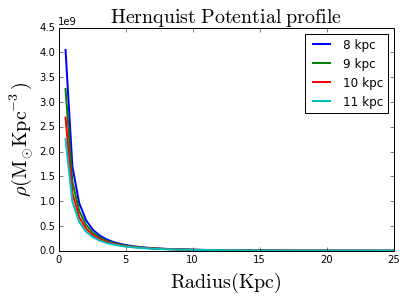

In [61]:
for i in range(8, 12):
    plot(R, Density_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel(r'$\mathrm{\rho (M_\odot Kpc^{-3})}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

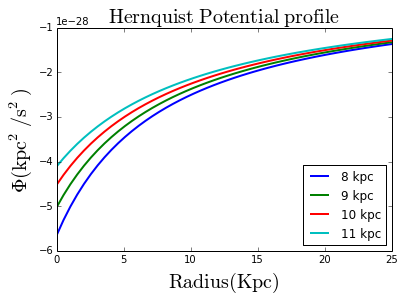

In [60]:
for i in range(8, 12):
    plot(R, Potential_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{\Phi(kpc^2/s^2)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

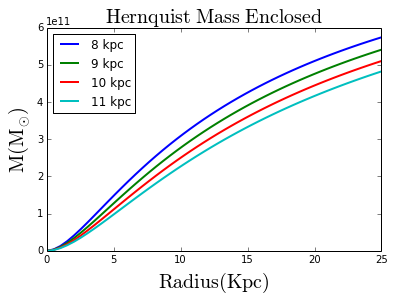

In [62]:
for i in range(8, 12):
    plot(R, Mass_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{M (M_\odot)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Mass\ Enclosed}$', fontsize=20)

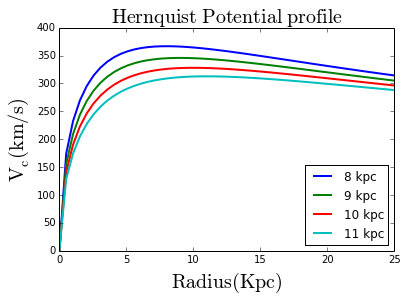

In [63]:
for i in range(8, 12):
    plot(R, vc_Hernquist(i, R, M), lw=2, label = str(i) + ' kpc')
xlabel('$\mathrm{Radius (Kpc)}$', fontsize=20)
ylabel('$\mathrm{V_c(km/s)}$', fontsize=20)
legend(loc='best')
title('$\mathrm{Hernquist\ Potential\ profile}$', fontsize=20)

In [ ]:
# Isothermal profile

# NFW 

$\rho_{NFW}(r) = \frac{\rho_0}{(r/a) (1 + r/a)^2}$

$M_{NFW}(r) = 4 \pi \rho_0 a^3 \left(  ln(1 + r/a) - \frac{r/a}{1 + r/a} \right)$

$\Phi_{NFW} = -4\pi G a^2 \frac{ln(1 + r/a)}{r/a}$

# Virial Radius and Virial Mass

$\rho_{vir} = \frac{3M_{vir}}{4 \pi r_{vir}^3} = \Delta_{vir} \Omega_m \rho_{crit} $

$r_{vir} = \left( \frac{3M_{vir}}{4 \pi \Delta_{vir} \Omega_m \rho_{crit} } \right )^{1/3}$

$\Delta_{vir}=360$ from cosmological simulations (Klypin et al 2011: http://arxiv.org/pdf/1002.3660v4.pdf)
at low z.

$\Omega_m = 0.27$

$\rho_{crit} = \frac{3H^2}{8\pi G}$

$H^2 = H_0^2 (\Omega_r a^{-4} + \Omega_m a^{-3} + \Omega_k a^{-2} + \Omega_{\Lambda})$

How you find r_vir?

In [28]:
def H(z, Omega0, H_0):
    Lambda0 = 1. - Omega0
    return H_0*(Omega0*(1+z)**3 - (Omega0+Lambda0-1)*(1+z)**2 + Lambda0)**0.5

def Omega_z(z,Omega0, H_0):
    return Omega0 * (1+z)**3 * (H_0/H(z,Omega0, H_0))**2

def rho_crit(G, z, Omega0, H_0):
    H2 = H(z, Omega0, H_0)**2
    rho = 3*H2 / (8*np.pi*G)
    return rho

In [29]:
H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
print H_0 

H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))

print H_0, G

70.0 km / (Mpc s)
2.26854550263e-18 1 / s 4.51835939627e-39 kpc3 / (s2 solMass)


In [30]:
pcrit = rho_crit(G, 0, 0.27, H_0)
print pcrit

135.955134016 solMass / kpc3


In [36]:
def rvir(Mvir, z):
    Mvir = Mvir * units.Msun
    G = constants.G
    G = G.to(units.kiloparsec**3 / (units.Msun * units.s**2)) 
    H_0 = 70*units.km / (units.s * units.Mpc)# km/sMpc
    H_0 = H_0.to(units.Mpc / (units.s * units.Mpc))
    Omega0 = 0.27
    Deltavir = 360
    pcrit = rho_crit(G, z, Omega0 , H_0)
    Rvir = ( 3*Mvir / (4 * np.pi * Deltavir * pcrit * Omega0) )**(1/3.)
    return Rvir

In [37]:
rvirt = rvir(1e10, 0)
print rvirt

56.530544834 kpc


# $\Delta_{vir}$

In [103]:
def Dvir(z):
    H = 70
    Omega0 = 0.27
    Omegaz = Omega_z(z, Omega0, H)
    x = Omegaz - 1
    Deltavir =  ( (18*np.pi**2) +  (82*x) - 39*x**2 ) / Omegaz
    return Deltavir

In [104]:
Z = linspace(0, 60, 100)
Dv = Dvir(Z)

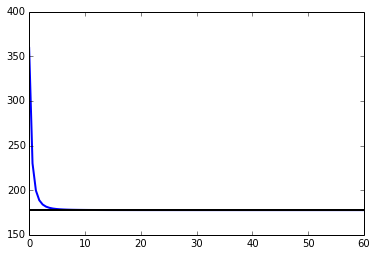

In [109]:
plot(Z, Dv, lw=2)
axhline(18*np.pi**2, lw=2, c='k')